# Import Modules & Register GraphLab

In [1]:
import graphlab as gl

# Part a) Data Cleansing in IPython:

# Read in CSV and JSON data

In [2]:
data_csv = gl.SFrame.read_csv('../Datasets/DATA8001_Assignment_Unicorn_Estate_Agents_MySQL_DB_Dump.csv')
data_json = gl.SFrame.read_json('../Datasets/DATA8001_Assignment_House4Sale_MongoDB_Dump.json')

This non-commercial license of GraphLab Create for academic use is assigned to gabriele.frattaroli@mycit.ie and will expire on February 07, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\frattarg\AppData\Local\Temp\graphlab_server_1492688340.log.0


Finished parsing file C:\Users\frattarg\Dropbox\DATA8001\Datasets\DATA8001_Assignment_Unicorn_Estate_Agents_MySQL_DB_Dump.csv

Parsing completed. Parsed 100 lines in 0.09008 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,long,str,str,str,str,str,str,str,str,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\frattarg\Dropbox\DATA8001\Datasets\DATA8001_Assignment_Unicorn_Estate_Agents_MySQL_DB_Dump.csv

Parsing completed. Parsed 14093 lines in 0.078056 secs.

Finished parsing file C:\Users\frattarg\Dropbox\DATA8001\Datasets\DATA8001_Assignment_House4Sale_MongoDB_Dump.json

Parsing completed. Parsed 1 lines in 0.138097 secs.

In [3]:
#Having a look at what the data looks like and the column types as well.
data_csv.head
data_json.head

<bound method SFrame.head of Columns:
	bathrooms	float
	bedrooms	str
	condition	str
	county	str
	floors	float
	grade	str
	id	int
	population	int
	price	str
	sqft_living	str
	sqft_lot	str
	town_city	str
	yr_built	int

Rows: 7520

Data:
+-----------+----------+-----------+----------+--------+
| bathrooms | bedrooms | condition |  county  | floors |
+-----------+----------+-----------+----------+--------+
|    2.0    |  Three   |  Average  | Kildare  |  1.0   |
|    1.5    |    3     |  Average  |  Meath   |  1.0   |
|    1.0    |    3     |  Average  | Kildare  |  1.0   |
|    2.5    |    3     |  Average  |   Cork   |  2.0   |
|    1.0    |    2     |    Good   | Limerick |  1.0   |
|    1.75   |    3     |    Good   | Kildare  |  1.0   |
|    1.0    |    4     |    Good   |  Dublin  |  1.5   |
|    1.0    |    2     |    Good   |  Meath   |  1.0   |
|    2.5    |    5     |  Average  |  Sligo   |  2.0   |
|    1.5    |    2     |  Average  |  Dublin  |  1.0   |
+-----------+----------+

In [4]:
data_master = data_csv # load in sql data
data_master = data_master.append(data_json) # load in json data 

# Visualise the dataset

In [5]:
data_master.head()

id,bathrooms,floors,yr_built,price,bedrooms,sqft_living,sqft_lot,condition
1,1.0,1.0,1955,"$221,900",3,1180,5650,Average
2,2.25,2.0,1951,"$538,000",3,2570,"7,242 sq ft",Average
3,1.0,1.0,1933,"$180,000",2,770,10000,Average
4,3.0,1.0,1965,"$604,000",4,1960,5000,Very Good
6,4.5,1.0,2001,"$1,230,000",Four,"5,420 sq ft",101930,Average
7,2.25,2.0,1995,"$257,500",3,"1,715 sq ft","6,819 sq ft",Average
11,2.5,1.0,1965,"$662,500",3,"3,560 sq ft",9796,Average
13,1.0,1.5,1927,"$310,000",3,1430,19901,Good
15,2.0,1.5,1900,"$530,000",5,"1,810 sq ft","4,850 sq ft",Average
16,3.0,2.0,1979,"$650,000",4,2950,5000,Average


In [6]:
gl.canvas.set_target('ipynb')

data_master.show()

# Defining the functions to clean the dataset

In [7]:
data_master['price'].unique()

dtype: str
Rows: 3625
['$333,760', '$528,000', '$729,032', '$353,900', '$1,910,000', '$593,567', '$704,111', '$364,900', '$654,300', '$571,900', '$583,800', '$245,560', '$738,500', '$250,250', '$151,600', '$319,450', '$235,000', '$438,750', '$937,750', '$402,723', '$483,453', '$533,250', '$461,000', '$587,750', '$178,000', '$2,160,000', '$496,752', '$825,750', '$830,005', '$390,000', '$2,250,000', '$319,502', '$418,800', '$339,995', '$942,990', '$335,620', '$421,000', '$3,350,000', '$672,800', '$615,750', '$359,900', '$386,000', '$866,059', '$495,200', '$222,200', '$339,275', '$902,500', '$585,188', '$719,521', '$674,600', '$214,950', '$286,800', '$767,250', '$702,000', '$685,100', '$428,750', '$349,000', '$255,000', '$629,950', '$541,000', '$278,100', '$609,500', '$624,000', '$679,975', '$605,500', '$890,776', '$324,800', '$424,305', '$324,900', '$855,000', '$713,250', '$279,500', '$715,000', '$613,500', '$515,700', '$476,900', '$428,040', '$1,940,000', '$153,503', '$2,210,000', '$253

In [8]:
#Function to clean the price data
def clean_price(data_in):
    output = 0
    if '$' in data_in:
        output = data_in.replace('$','').replace(',','')
        output = float(output)
    else:
        output = float(output)
    return output
# Test function
print type(clean_price('$1,000,000'))
print (clean_price('$1,000,000'))

<type 'float'>
1000000.0


In [9]:
data_master['bedrooms'].unique()

dtype: str
Rows: 23
['Nine', 'Seven', '7', '6', '8', 'Four', 'Three', 'Thirteen', '2', 'One', '4', '5', 'Two', 'Six', '9', '11', 'Five', '3', 'Zero', '1', '0', 'Eight', '10']

In [10]:
#Function to clean the bedrooms data
def clean_bedrooms(data_in):
    output = 0
    if 'Nine' in data_in:
        output = data_in.replace('Nine','9')
        output = int(output)
    elif 'Seven' in data_in:
        output = data_in.replace('Seven','7')
        output = int(output)
    elif 'Four' in data_in:
        output = data_in.replace('Four','4')
        output = int(output)
    elif 'Three' in data_in:
        output = data_in.replace('Three','3')
        output = int(output)
    elif 'Thirteen' in data_in:
        output = data_in.replace('Thirteen','13')
        output = int(output)
    elif 'One' in data_in:
        output = data_in.replace('One','1')
        output = int(output)
    elif 'Two' in data_in:
        output = data_in.replace('Two','2')
        output = int(output)
    elif 'Six' in data_in:
        output = data_in.replace('Six','6')
        output = int(output)
    elif 'Five' in data_in:
        output = data_in.replace('Five','5')
        output = int(output)
    elif 'Zero' in data_in:
        output = data_in.replace('Zero','0')
        output = int(output)
    elif 'Eight' in data_in:
        output = data_in.replace('Eight','8')
        output = int(output)
    else:
        output = int(data_in)
    return output

print type(clean_bedrooms('Five'))
print (clean_bedrooms('Nine'))
print type(clean_bedrooms('8'))

<type 'int'>
9
<type 'int'>


In [11]:
data_master['sqft_living'].unique()
data_master['sqft_lot'].unique()

dtype: str
Rows: 11773
['18653', '4,084 sq ft', '35,654 sq ft', '8467', '7,900 sq ft', '1484', '8512', '23,478 sq ft', '36136', '2,814 sq ft', '46902', '5,904 sq ft', '15258', '3,713 sq ft', '3952', '204,296 sq ft', '5474', '21,781 sq ft', '11884', '4759', '6834', '45,254 sq ft', '8190', '35610', '200811', '9,702 sq ft', '85226', '6871', '5564', '10637', '8912', '6375', '8,846 sq ft', '27468', '4,175 sq ft', '3048', '1,288 sq ft', '1,323 sq ft', '10304', '7029', '20383', '507038', '1749', '9,122 sq ft', '6,375 sq ft', '7,230 sq ft', '9,594 sq ft', '2128', '4076', '12056', '15,480 sq ft', '9775', '9,087 sq ft', '6341', '4780', '31200', '18,168 sq ft', '6326', '18296', '11060', '7,843 sq ft', '5439', '40471', '8584', '5283', '9,900 sq ft', '34,500 sq ft', '4,172 sq ft', '7326', '18129', '6268', '8255', '5506', '17688', '7322', '6,126 sq ft', '7,208 sq ft', '12,080 sq ft', '10519', '8327', '7,853 sq ft', '22089', '11141', '4,936 sq ft', '10,908 sq ft', '131115', '8721', '15053', '21907', 

In [12]:
# Function to clean the sqft lot/living data
def clean_sqft(data_in):
    data_out = 0
    if 'sq ft' in data_in: # search the string for the word sq
        data_out = data_in.replace('sq ft','').replace(',','')
        data_out = int(data_out) # convert from string to float
    else:
        data_out = int(data_in) #convert the original input from string to float
    
    return data_out

# Test function
print clean_sqft('2,678 sq ft')
print type(clean_sqft('2,678 sq ft'))
print type(clean_sqft('1110'))


2678
<type 'int'>
<type 'int'>


In [13]:
data_master['condition'].unique()

dtype: str
Rows: 5
['Very Good', 'Average', 'Poor', 'Good', 'Below Average']

In [14]:
# Function to clean the condition data
def clean_condition(data_in):
    data_out = 0
    if 'Very Good' in data_in:
        data_out = data_in.replace('Very Good','5')
        data_out = int(data_out)
    elif 'Good' in data_in:
        data_out = data_in.replace('Good','4')
        data_out = int(data_out)
    elif 'Below' in data_in:
        data_out = data_in.replace('Below Average','2')
        data_out = int(data_out)        
    elif 'Average' in data_in:
        data_out = data_in.replace('Average','3')
        data_out = int(data_out)      
    elif 'Poor' in data_in:
        data_out = data_in.replace('Poor','1')
        data_out = int(data_out)
    else:
        data_out = int(data_in)
    
    return data_out

# Test function
print clean_condition('Very Good')
print clean_condition('Below Average')
print clean_condition('Average')
print type(clean_condition('Poor'))


5
2
3
<type 'int'>


In [15]:
data_master['grade'].unique()

dtype: str
Rows: 12
['13) High Quality Building Construction', '10) Good Quality Building Construction', '7) Average Building Construction', '5) Below Average Building Construction', '12) High Quality Building Construction', '6) Below Average Building Construction', '3) Poor Building Construction', '4) Below Average Building Construction', '8) Average Building Construction', '11) Good Quality Building Construction', '9) Good Quality Building Construction', '1) Poor Building Construction']

In [16]:
# Function to clean the grade data
def clean_grade(data_in):
    data_out = 0
    if 'High' in data_in:
        data_out = data_in.replace('High Quality Building Construction','').replace(')','')
        data_out = int(data_out)
    elif 'Good' in data_in:
        data_out = data_in.replace(') Good Quality Building Construction','').replace(')','')
        data_out = int(data_out)
    elif 'Below Average ' in data_in:
        data_out = data_in.replace(') Below Average Building Construction','').replace(')','')
        data_out = int(data_out)
    elif 'Average' in data_in:
        data_out = data_in.replace(') Average Building Construction','').replace(')','')
        data_out = int(data_out)
    elif 'Below' in data_in:
        data_out = data_in.replace(') Below Average Building Construction','').replace(')','')
        data_out = int(data_out)
    elif 'Poor' in data_in:
        data_out = data_in.replace(') Poor Building Construction','').replace(')','')
        data_out = int(data_out)
    else:
        data_out = int(data_in) 
    
    return data_out

# Test function
print clean_grade('3) Poor Building Construction')
print clean_grade('6) Below Average Building Construction')
print clean_grade('7) Average Building Construction')
print type(clean_grade('13) High Quality Building Construction'))


3
6
7
<type 'int'>


In [17]:
data_master['bathrooms'].unique()

dtype: float
Rows: 30
[4.25, 6.75, 0.75, 6.0, 4.75, 5.25, 6.5, 7.75, 1.75, 6.25, 7.5, 2.0, 0.0, 4.0, 5.75, 2.75, 3.75, 3.0, 2.5, 4.5, 2.25, 1.25, 1.5, 5.5, 1.0, 3.25, 5.0, 8.0, 0.5, 3.5]

In [18]:
# Clone a copy of the original dataset
data_master_clean = data_master

In [19]:
# Apply the price transformation
data_master_clean['price_clean'] = data_master_clean.apply(lambda x:clean_price(x['price']))

In [20]:
# Apply the bedrooms transformation
data_master_clean['bedrooms_clean'] = data_master_clean.apply(lambda x:clean_bedrooms(x['bedrooms']))

In [21]:
# Apply the sqft transformation to sqft_living
data_master_clean['sqft_living_clean'] = data_master_clean.apply(lambda x:clean_sqft(x['sqft_living']))

In [22]:
# Apply the sqft transformation to sqft_lot
data_master_clean['sqft_lot_clean'] = data_master_clean.apply(lambda x:clean_sqft(x['sqft_lot']))

In [23]:
# Apply the condition transformation
data_master_clean['condition_clean'] = data_master_clean.apply(lambda x:clean_condition(x['condition']))

In [24]:
# Apply the grade transformation
data_master_clean['grade_clean'] = data_master_clean.apply(lambda x:clean_grade(x['grade']))

In [25]:
data_master_clean.head()

id,bathrooms,floors,yr_built,price,bedrooms,sqft_living,sqft_lot,condition
1,1.0,1.0,1955,"$221,900",3,1180,5650,Average
2,2.25,2.0,1951,"$538,000",3,2570,"7,242 sq ft",Average
3,1.0,1.0,1933,"$180,000",2,770,10000,Average
4,3.0,1.0,1965,"$604,000",4,1960,5000,Very Good
6,4.5,1.0,2001,"$1,230,000",Four,"5,420 sq ft",101930,Average
7,2.25,2.0,1995,"$257,500",3,"1,715 sq ft","6,819 sq ft",Average
11,2.5,1.0,1965,"$662,500",3,"3,560 sq ft",9796,Average
13,1.0,1.5,1927,"$310,000",3,1430,19901,Good
15,2.0,1.5,1900,"$530,000",5,"1,810 sq ft","4,850 sq ft",Average
16,3.0,2.0,1979,"$650,000",4,2950,5000,Average


In [26]:
data_master_clean.remove_column('price') # once its removed, it can't be removed again
data_master_clean.remove_column('bedrooms')
data_master_clean.remove_column('sqft_living')
data_master_clean.remove_column('sqft_lot')
data_master_clean.remove_column('condition')
data_master_clean.remove_column('grade')

id,bathrooms,floors,yr_built,town_city,county,population,price_clean,bedrooms_clean,sqft_living_clean
1,1.0,1.0,1955,Shannon,Clare,9673,221900.0,3,1180
2,2.25,2.0,1951,Portlaoise,Laois,20145,538000.0,3,2570
3,1.0,1.0,1933,Cobh,Cork,12347,180000.0,2,770
4,3.0,1.0,1965,Athy,Kildare,9926,604000.0,4,1960
6,4.5,1.0,2001,Wexford,Wexford,20072,1230000.0,4,5420
7,2.25,2.0,1995,Mallow,Cork,11605,257500.0,3,1715
11,2.5,1.0,1965,Youghal,Cork,7794,662500.0,3,3560
13,1.0,1.5,1927,Cobh,Cork,12347,310000.0,3,1430
15,2.0,1.5,1900,Cavan,Cavan,10205,530000.0,5,1810
16,3.0,2.0,1979,Celbridge,Kildare,19537,650000.0,4,2950


In [27]:
data_master_clean.rename({ 'price_clean':'price'})
data_master_clean.rename({ 'bedrooms_clean':'bedrooms'})
data_master_clean.rename({ 'sqft_living_clean':'sqft_living'})
data_master_clean.rename({ 'sqft_lot_clean':'sqft_lot'})
data_master_clean.rename({ 'condition_clean':'condition'})
data_master_clean.rename({ 'grade_clean':'grade'})

id,bathrooms,floors,yr_built,town_city,county,population,price,bedrooms,sqft_living,sqft_lot
1,1.0,1.0,1955,Shannon,Clare,9673,221900.0,3,1180,5650
2,2.25,2.0,1951,Portlaoise,Laois,20145,538000.0,3,2570,7242
3,1.0,1.0,1933,Cobh,Cork,12347,180000.0,2,770,10000
4,3.0,1.0,1965,Athy,Kildare,9926,604000.0,4,1960,5000
6,4.5,1.0,2001,Wexford,Wexford,20072,1230000.0,4,5420,101930
7,2.25,2.0,1995,Mallow,Cork,11605,257500.0,3,1715,6819
11,2.5,1.0,1965,Youghal,Cork,7794,662500.0,3,3560,9796
13,1.0,1.5,1927,Cobh,Cork,12347,310000.0,3,1430,19901
15,2.0,1.5,1900,Cavan,Cavan,10205,530000.0,5,1810,4850
16,3.0,2.0,1979,Celbridge,Kildare,19537,650000.0,4,2950,5000


### Grouping the sqft_living data to faciliate data visualization

In [28]:
# Creating a new column 
data_master_clean['sqft_living_description'] = 0
data_master_clean.head()

id,bathrooms,floors,yr_built,town_city,county,population,price,bedrooms,sqft_living,sqft_lot
1,1.0,1.0,1955,Shannon,Clare,9673,221900.0,3,1180,5650
2,2.25,2.0,1951,Portlaoise,Laois,20145,538000.0,3,2570,7242
3,1.0,1.0,1933,Cobh,Cork,12347,180000.0,2,770,10000
4,3.0,1.0,1965,Athy,Kildare,9926,604000.0,4,1960,5000
6,4.5,1.0,2001,Wexford,Wexford,20072,1230000.0,4,5420,101930
7,2.25,2.0,1995,Mallow,Cork,11605,257500.0,3,1715,6819
11,2.5,1.0,1965,Youghal,Cork,7794,662500.0,3,3560,9796
13,1.0,1.5,1927,Cobh,Cork,12347,310000.0,3,1430,19901
15,2.0,1.5,1900,Cavan,Cavan,10205,530000.0,5,1810,4850
16,3.0,2.0,1979,Celbridge,Kildare,19537,650000.0,4,2950,5000


In [29]:
#Getting the data that will be used to create categories for sqft_living
import numpy as np

sqftmin = min(data_master_clean['sqft_living'])
sqftmax = max(data_master_clean['sqft_living'])
sqftmedian = np.median(data_master_clean['sqft_living'])
q25 = np.percentile(data_master_clean['sqft_living'],25)
q75 = np.percentile(data_master_clean['sqft_living'],75)

print sqftmin
print q25
print sqftmedian
print q75
print sqftmax

print '1st quartile starts at', sqftmin, 'and ends at', q25
print '2nd quartile starts at', q25, 'and ends at', sqftmedian
print '3rd quartile starts at', sqftmedian, 'and ends at', q75
print '4th quartile starts at', q75, 'and ends at', sqftmax

290
1427.0
1910.0
2550.0
13540
1st quartile starts at 290 and ends at 1427.0
2nd quartile starts at 1427.0 and ends at 1910.0
3rd quartile starts at 1910.0 and ends at 2550.0
4th quartile starts at 2550.0 and ends at 13540


In [30]:
# I'll group the data into 4 different categories all based on the data relative quartiles
# I'll assign a qualitative value for these categories.
# This is the function that will substitute the values into sqft description (which is empty at the moment)
def sqft_desc(x):
    
    if(290 < x < 1427):
        desc = 'Small'
    elif(1427 < x < 1910):
        desc = 'Medium'
    elif(1910 < x < 2550):
        desc = 'Large'
    else:
        desc = 'Very large'
    return desc


In [31]:
data_master_clean['sqft_living_description'] = data_master_clean.apply(lambda x:sqft_desc(x['sqft_living']))

In [32]:
data_master_clean.head()

id,bathrooms,floors,yr_built,town_city,county,population,price,bedrooms,sqft_living,sqft_lot
1,1.0,1.0,1955,Shannon,Clare,9673,221900.0,3,1180,5650
2,2.25,2.0,1951,Portlaoise,Laois,20145,538000.0,3,2570,7242
3,1.0,1.0,1933,Cobh,Cork,12347,180000.0,2,770,10000
4,3.0,1.0,1965,Athy,Kildare,9926,604000.0,4,1960,5000
6,4.5,1.0,2001,Wexford,Wexford,20072,1230000.0,4,5420,101930
7,2.25,2.0,1995,Mallow,Cork,11605,257500.0,3,1715,6819
11,2.5,1.0,1965,Youghal,Cork,7794,662500.0,3,3560,9796
13,1.0,1.5,1927,Cobh,Cork,12347,310000.0,3,1430,19901
15,2.0,1.5,1900,Cavan,Cavan,10205,530000.0,5,1810,4850
16,3.0,2.0,1979,Celbridge,Kildare,19537,650000.0,4,2950,5000


In [33]:
data_master_clean.save('../Datasets/DATA8001_Assignment_Unicorn_Estate_Agents_v2.csv', format='csv')

# Part B) Summary Statistics in IPython:

##### Min, Max, Avg, Std Dev House price for the country:

In [34]:
data_master_clean.show()

In [35]:
print 'Mean house price for the country: ',data_master_clean['price'].mean() # Average
print 'Minimum value house price for the country: ',data_master_clean['price'].min() # Min value
print 'Maximum value house price for the country: ',data_master_clean['price'].max() # Max Value
print 'Standard deviaton value house price for the country: ',data_master_clean['price'].std() # Standard Deviation

Mean house price for the country:  540182.158793
Minimum value house price for the country:  75000.0
Maximum value house price for the country:  7700000.0
Standard deviaton value house price for the country:  367353.732979


##### Min, Max, Avg, Std Dev House price for each county:

In [36]:
import graphlab.aggregate as agg

PriceRate = data_master_clean.groupby(key_columns='county',operations={'Avg_house_price': agg.AVG('price'),
                                                                      'Max_house_price': agg.MAX('price'),
                                                                      'Min_house_price': agg.MIN('price'),
                                                                      'Std_house_price': agg.STD('price')})

PriceRate = PriceRate.sort([('county',True)])
print 'This table shows the minimum, maximum, average and the standard deviation value for each of the counties: '
print PriceRate

This table shows the minimum, maximum, average and the standard deviation value for each of the counties: 
+----------+-----------------+-----------------+-----------------+-----------------+
|  county  | Min_house_price | Max_house_price | Avg_house_price | Std_house_price |
+----------+-----------------+-----------------+-----------------+-----------------+
|  Carlow  |     153000.0    |    4500000.0    |   423736.90583  |  267940.005157  |
|  Cavan   |     290000.0    |    2950000.0    |  579109.808271  |  231523.429227  |
|  Clare   |     90000.0     |    1700000.0    |  360525.470899  |  130037.789023  |
|   Cork   |     110000.0    |    7060000.0    |  716295.769429  |  646632.485366  |
| Donegal  |     330000.0    |    7700000.0    |  815803.786638  |  451463.103374  |
|  Dublin  |     75000.0     |    3650000.0    |  479572.500546  |  285616.079256  |
|  Galway  |     105500.0    |    2200000.0    |  569214.175396  |  214927.182356  |
|  Kerry   |     95000.0     |    2000000.0

#### For County Cork, Min, Max, Avg, Std Dev House price by: 
##### bedrooms, square foot living space, condition & grades

In [37]:
#Filtering the master database by just the entries we have for Cork
NewCountyCork = data_master_clean[(data_master_clean['county'] == 'Cork')]
#Making tables grouped by the desired columns
PriceRateBedrooms = NewCountyCork.groupby(key_columns='bedrooms',operations={'Avg_house_price': agg.AVG('price'),
                                                                      'Max_house_price': agg.MAX('price'),
                                                                      'Min_house_price': agg.MIN('price'),
                                                                      'Std_house_price': agg.STD('price')})
PriceRatesqftliving = NewCountyCork.groupby(key_columns='sqft_living_description',operations={'Avg_house_price': agg.AVG('price'),
                                                                      'Max_house_price': agg.MAX('price'),
                                                                      'Min_house_price': agg.MIN('price'),
                                                                      'Std_house_price': agg.STD('price')})
PriceRatecondition = NewCountyCork.groupby(key_columns='condition',operations={'Avg_house_price': agg.AVG('price'),
                                                                      'Max_house_price': agg.MAX('price'),
                                                                      'Min_house_price': agg.MIN('price'),
                                                                      'Std_house_price': agg.STD('price')})
PriceRategrades = NewCountyCork.groupby(key_columns='grade',operations={'Avg_house_price': agg.AVG('price'),
                                                                      'Max_house_price': agg.MAX('price'),
                                                                      'Min_house_price': agg.MIN('price'),
                                                                      'Std_house_price': agg.STD('price')})

In [38]:
PriceRateBedrooms = PriceRateBedrooms.sort([('bedrooms', False)])
print 'This table shows the minimum, maximum, average and the standard deviation value for the entries in Cork' 
print 'grouped by bedrooms: '
print PriceRateBedrooms

This table shows the minimum, maximum, average and the standard deviation value for the entries in Cork
grouped by bedrooms: 
+----------+-----------------+-----------------+-----------------+-----------------+
| bedrooms | Min_house_price | Max_house_price | Avg_house_price | Std_house_price |
+----------+-----------------+-----------------+-----------------+-----------------+
|    10    |    1150000.0    |    1150000.0    |    1150000.0    |       0.0       |
|    8     |    1650000.0    |    2150000.0    |    1900000.0    |     250000.0    |
|    7     |     539000.0    |    2450000.0    |  1438985.71429  |  714573.879872  |
|    6     |     230000.0    |    6890000.0    |  1309479.16667  |   1570136.6148  |
|    5     |     175000.0    |    7060000.0    |  1276659.76549  |  957814.931727  |
|    4     |     152500.0    |    4490000.0    |  796553.619174  |  608544.616779  |
|    3     |     110000.0    |    3400000.0    |  503150.506555  |  376427.556926  |
|    2     |     153503.

In [39]:
PriceRatesqftliving = PriceRatesqftliving.sort([('Max_house_price', False)])
print 'This table shows the minimum, maximum, average and the standard deviation value for the entries in Cork' 
print 'grouped by sqft living categories: '
print PriceRatesqftliving

This table shows the minimum, maximum, average and the standard deviation value for the entries in Cork
grouped by sqft living categories: 
+-------------------------+-----------------+-----------------+-----------------+
| sqft_living_description | Min_house_price | Max_house_price | Avg_house_price |
+-------------------------+-----------------+-----------------+-----------------+
|        Very large       |     230000.0    |    7060000.0    |  1178964.56657  |
|          Large          |     182000.0    |    1620000.0    |  540876.547529  |
|          Medium         |     152500.0    |    1430000.0    |  407618.019651  |
|          Small          |     110000.0    |    1050000.0    |  348709.798419  |
+-------------------------+-----------------+-----------------+-----------------+
+-----------------+
| Std_house_price |
+-----------------+
|  840675.318901  |
|  266483.488013  |
|  214857.466688  |
|   197255.0776   |
+-----------------+
[4 rows x 5 columns]



In [40]:
PriceRatecondition = PriceRatecondition.sort([('condition', False)])
print 'This table shows the minimum, maximum, average and the standard deviation value for the entries in Cork' 
print 'grouped by condition: '
print PriceRatecondition

This table shows the minimum, maximum, average and the standard deviation value for the entries in Cork
grouped by condition: 
+-----------+-----------------+-----------------+-----------------+
| condition | Min_house_price | Max_house_price | Avg_house_price |
+-----------+-----------------+-----------------+-----------------+
|     5     |     110000.0    |    2490000.0    |  910874.533981  |
|     4     |     118000.0    |    5300000.0    |  764008.661642  |
|     3     |     128000.0    |    7060000.0    |  677485.797898  |
|     2     |     235500.0    |     800000.0    |     520875.0    |
|     1     |     196000.0    |    1500000.0    |     848000.0    |
+-----------+-----------------+-----------------+-----------------+
+-----------------+
| Std_house_price |
+-----------------+
|  527305.980034  |
|  580528.961803  |
|  681347.730579  |
|  211524.932041  |
|     652000.0    |
+-----------------+
[5 rows x 5 columns]



In [41]:
PriceRategrades = PriceRategrades.sort([('grade', False)])
print 'This table shows the minimum, maximum, average and the standard deviation value for the entries in Cork' 
print 'grouped by grade: '
print PriceRategrades

This table shows the minimum, maximum, average and the standard deviation value for the entries in Cork
grouped by grade: 
+-------+-----------------+-----------------+-----------------+-----------------+
| grade | Min_house_price | Max_house_price | Avg_house_price | Std_house_price |
+-------+-----------------+-----------------+-----------------+-----------------+
|   13  |    3800000.0    |    6890000.0    |    5420000.0    |  1265938.38713  |
|   12  |    1460000.0    |    5350000.0    |  3412941.17647  |  1097450.33229  |
|   11  |     550000.0    |    7060000.0    |   2078397.4359  |  879546.974588  |
|   10  |     389000.0    |    3400000.0    |  1348911.57714  |  552611.497083  |
|   9   |     315000.0    |    2700000.0    |  925402.636986  |  476192.660872  |
|   8   |     160000.0    |    2200000.0    |  583767.240351  |   326587.11002  |
|   7   |     128000.0    |    1570000.0    |  395185.811245  |  200547.650762  |
|   6   |     110000.0    |    1200000.0    |  351850.105

##### What is the age of the oldest house on the books for Cork?

In [42]:
#this will work for every year not just for the current one
import datetime
now = datetime.datetime.now()
Age = now.year - NewCountyCork['yr_built'].min()  # Average
print 'The oldest house on the books for Cork is',Age,'years old'

The oldest house on the books for Cork is 115 years old


# Part D) Data Modelling in IPython

## Import libraries

In [1]:
import graphlab as gl
import math
import matplotlib.pyplot as plt
%matplotlib inline


### Load the data

In [2]:
data_master_clean = gl.SFrame.read_csv('../Datasets/DATA8001_Assignment_Unicorn_Estate_Agents_v2.csv', verbose=False)

This non-commercial license of GraphLab Create for academic use is assigned to gabriele.frattaroli@mycit.ie and will expire on February 07, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\frattarg\AppData\Local\Temp\graphlab_server_1492781760.log.0


### Visualise the dataset

In [3]:
data_master_clean.head()

id,bathrooms,floors,yr_built,town_city,county,population,price,bedrooms,sqft_living,sqft_lot
1,1.0,1.0,1955,Shannon,Clare,9673,221900.0,3,1180,5650
2,2.25,2.0,1951,Portlaoise,Laois,20145,538000.0,3,2570,7242
3,1.0,1.0,1933,Cobh,Cork,12347,180000.0,2,770,10000
4,3.0,1.0,1965,Athy,Kildare,9926,604000.0,4,1960,5000
6,4.5,1.0,2001,Wexford,Wexford,20072,1230000.0,4,5420,101930
7,2.25,2.0,1995,Mallow,Cork,11605,257500.0,3,1715,6819
11,2.5,1.0,1965,Youghal,Cork,7794,662500.0,3,3560,9796
13,1.0,1.5,1927,Cobh,Cork,12347,310000.0,3,1430,19901
15,2.0,1.5,1900,Cavan,Cavan,10205,530000.0,5,1810,4850
16,3.0,2.0,1979,Celbridge,Kildare,19537,650000.0,4,2950,5000


## What is the dependant variable (output) & what are the inputs to your model

**output** = price <br/>
**inputs or features of your model** = bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, yr_built <br/>

i.e., can we estimate the price of a house based on features of the house?


### Declaring the functions for modeling

In [4]:
# Create a function to calculate the intercept & slope using the above formulae
def get_intercept_slope(input_features, output):
    
    meanX = input_features.mean()
    meanY = output.mean()
    meanXY = (input_features * output).mean()
    meanXX = (input_features**2).mean()
    
    num = meanXY - (meanX * meanY)
    den = meanXX - (meanX * meanX)
    
    slope = num / den
    intercept = meanY - (slope * meanX)
    
    return (intercept, slope)

In [5]:
# using the regression line formula
def get_regression_predictions(input_features, intercept, slope):
    
    # calculate the predicted values:
    predicted_values = intercept + (slope * input_features)
    
    return predicted_values

In [6]:
def inverse_regression_predictions(output, intercept, slope):

    # solve output = intercept + slope * input for input. 
    # Use this equation to compute the inverse predictions:
    
    estimated_input = (output - intercept) / slope

    return estimated_input

In [7]:
# Calculate the residual sum of squares
def get_rss(input_features, output, intercept, slope):
    
    # First get the predictions
    prediction = get_regression_predictions(input_features, intercept, slope)
    
    # then compute the errors / residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - prediction
    
    # square the residuals and add them up
    rss = (residuals**2).sum()

    return(rss)

In [8]:
# Calculate the root mean square error
def get_rmse(input_features, output, intercept, slope):
    
    # First get the predictions
    prediction = get_regression_predictions(input_features, intercept, slope)
    
    # then compute the errors / residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - prediction
    
    # square the residuals and add them up
    rmse = math.sqrt((residuals**2).mean())

    return(rmse)

### Create a function to call all the required steps

In [9]:
def get_regression_model_rss(input_features, output):
    # Calculate the intercept & slope
    intercept, slope = get_intercept_slope(input_features, output)
    # Calculatet RSS on the predicitons (i.e., actual - predicted)
    rss = get_rss(input_features, output, intercept, slope)
    return rss

### Spilt the data into training & testing datasets

In [10]:
student_id = 4141
# replace clean_data with the name of your cleansed dataset
train_data, test_data = data_master_clean.random_split(.8, seed=student_id)

## Calculate the intercept, slope, regression line on the training dataset

In [11]:
# Creating a basic model with sqft_living as a feature
features_basic = ['sqft_living']
# get the intercept & slope of the training dataset
intercept_sqft_living, slope_sqft_living = get_intercept_slope(train_data['sqft_living'], train_data['price']) 
print 'intercept = ', intercept_sqft_living, 'slope = ', slope_sqft_living

intercept =  -46568.1720856 slope =  282.308526455


## Iterate over the diffrent features

In [12]:
all_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','yr_built']

for f in range(0, len(all_features)):
    # using string format notation
    print 'the rss using %s = %s' % (all_features[f], get_regression_model_rss(train_data[all_features[f]], train_data['price']))

the rss using bedrooms = 2.14902671218e+15
the rss using bathrooms = 1.72666837544e+15
the rss using sqft_living = 1.213905141e+15
the rss using sqft_lot = 2.36118938354e+15
the rss using floors = 2.22816941351e+15
the rss using condition = 2.3777214972e+15
the rss using grade = 1.32330912562e+15
the rss using yr_built = 2.376351371e+15


### b.Answer: sqft_living is the best individual feature to predict house prices across all counties due to its RSS being the lowest in comparision with all the features of the database

# GraphLab linear regression model

In [13]:
model_basic = gl.linear_regression.create(train_data, target='price', features=features_basic, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17287

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.018791     | 4344760.375270     | 264991.875766 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

### Model coefficients

In [14]:
print model_basic.coefficients

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -46566.0958179 | 4982.08878123 |
| sqft_living |  None | 282.307528676  | 2.18952903613 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]



### Using the graphlab model to make some predictions

In [15]:
example_predictions = model_basic.predict(train_data) # save all predictions in a new SFrame
print train_data[0]
print
print 'Est price for a house with', train_data[0]['sqft_living'], ' sq ft = ', example_predictions[0] # print the first graphlab model prediction 

# compare with our own function
print 'The estimated price for a house with ', train_data[0]['sqft_living'], ' sq ft living space is ', get_regression_predictions(train_data[0]['sqft_living'], intercept_sqft_living, slope_sqft_living)

{'bathrooms': 1.0, 'grade': 7L, 'price': 221900.0, 'bedrooms': 3L, 'town_city': 'Shannon', 'sqft_living_description': 'Small', 'county': 'Clare', 'sqft_living': 1180L, 'floors': 1.0, 'condition': 3L, 'yr_built': 1955L, 'id': 1L, 'sqft_lot': 5650L, 'population': 9673L}

Est price for a house with 1180  sq ft =  286556.78802
The estimated price for a house with  1180  sq ft living space is  286555.889131


### Evaluate the model on the test data

In [16]:
# What is the test error?
print model_basic.evaluate(test_data)

{'max_error': 2895282.791121848, 'rmse': 247629.90096504672}


In [17]:
# Calculate the test error using 
print 'RMSE = ', get_rmse(test_data['sqft_living'], test_data['price'], intercept_sqft_living, slope_sqft_living)

RMSE =  247629.926456


### Plot the data and fitted line

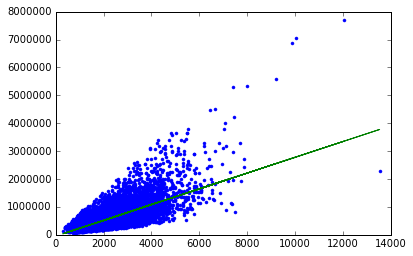

In [18]:
plt.plot(train_data['sqft_living'], train_data['price'], '.', 
         train_data['sqft_living'], model_basic.predict(train_data), '-')

# Finding the best 3 features (if available)

1. From the original list of input features, select the one with lowest RMSE

2. Remove this feature from the original list and add to a new list of best features

3. Iterate over all remaining features, selecting the next feature that in combination with initial feature, provides a lower RMSE

4. Continues until the 3 best features are selected

5. print the list of features in best features list

In [19]:
def get_features(best_features, new_feature):
    
    features = list(best_features) # this is a shallow copy, ensure your new list is a copy/clone of the oiginal list
    
    # if you coded: features = best_features, you don't actually have two lists. 
    # The assignment (=) just copies the reference to the list, not the actual list, 
    # Both features and best_features refer to the same list after the assignment leading to errors in the code, try it!
    
    features.append(new_feature)
    
    return features

In [20]:
def get_model_rmse(data, best_features, new_feature, output):
    
    # Create all features list
    features = get_features(best_features, new_feature)
    
    # Create the linear regression model
    model = gl.linear_regression.create(data,target=output,features=features,validation_set=None,verbose=False)
    
    # get the RMSE of the current model on the dataset
    rmse = model.evaluate(data)['rmse']
    
    return rmse

In [21]:
def get_best_features_rmse(data, best_features, new_features, output):
    
    # Create an empty feature_rmse list
    feature_rmse = []
    
    # calculate the rmse for each individal feature    
    for f in range(0, len(new_features)):
        feature_rmse.append({'feature': new_features[f], 'rmse': get_model_rmse(data, best_features, new_features[f], output)})
    
    # sort the list to have min rmse at the top (i.e., zero position in list)
    feature_rmse = sorted(feature_rmse, key=lambda i: i['rmse'], reverse=False)

    # return top item from list, i.e. feature with lowest rmse
    return feature_rmse[0]

In [22]:
# As the algorithm progresses, the features_original decreases and the features_best increases until:
# A) All features are selected
# B) Addition of features doen't improve RSS

# List of all original features
features_original = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','yr_built']
# A list
features_current = list(features_original)
# A list of the best features each iteration of the algorithm
features_best = []
# has the best solution (least rmse) for the model een found
best_solution_found = False

# Get the value of the current calculation
rmse_current = 0.0

# The best rmse to date, initialise to infinity, then any other number has to be smaller
rmse_best = float("inf")

# start a while loop to iterate over the potential features, 
# adding the best feature (i.e., feature that minimises the model rmse)
while best_solution_found == False:
    
    # get the 
    best_feature = get_best_features_rmse(train_data, features_best, features_current, 'price')    

    if best_feature['rmse'] < rmse_best:
        rmse_best = best_feature['rmse']
        features_best.append(best_feature['feature'])
        features_current.remove(best_feature['feature']) 
    else:
        best_solution_found = True

    if len(features_current) == 5: # this will stop the loop selecting the best 3 features
        best_solution_found = True
            
    print 'Best feature =', best_feature['feature'], ', model rmse =', best_feature['rmse']

print
print 'Best model features: ', features_best
print 'Best model rmse: ', rmse_best

Best feature = sqft_living , model rmse = 264991.875766
Best feature = grade , model rmse = 253799.462808
Best feature = yr_built , model rmse = 234485.541631

Best model features:  ['sqft_living', 'grade', 'yr_built']
Best model rmse:  234485.541631


### c. Answer: the 3 best features to predict house prices across all countries are: 'sqft_living','grade ' & 'yr_built'.

In [23]:
model_advanced = gl.linear_regression.create(train_data, target='price', 
                                             features=features_best, validation_set=None, verbose=False)
#print model_advacned.coefficients
print model_advanced.evaluate(test_data)

{'max_error': 2986283.02136705, 'rmse': 219082.11415647776}


In [24]:
# comparing the new predictions with our old function
new_example_predictions = model_advanced.predict(test_data) # save all predictions in a new SFrame
print
print 'Estimated price by the multi-featured model for a house with', test_data[0]['sqft_living'], ' sq ft = ', new_example_predictions[0] # print the first graphlab model prediction 
print 'Estimated price by the multi-featured model for a house with', test_data[10]['sqft_living'], ' sq ft = ', new_example_predictions[10] # print the first graphlab model prediction 
print 'Estimated price by the multi-featured model for a house with', test_data[20]['sqft_living'], ' sq ft = ', new_example_predictions[20] # print the first graphlab model prediction 
print 'Estimated price by the multi-featured model for a house with', test_data[30]['sqft_living'], ' sq ft = ', new_example_predictions[30] # print the first graphlab model prediction 
print 'Estimated price by the multi-featured model for a house with', test_data[40]['sqft_living'], ' sq ft = ', new_example_predictions[40] # print the first graphlab model prediction 

# compare with our own function
print
print 'The estimated price for a house with ', test_data[0]['sqft_living'], ' sq ft living space is ', get_regression_predictions(test_data[0]['sqft_living'], intercept_sqft_living, slope_sqft_living)


Estimated price by the multi-featured model for a house with 770  sq ft =  206933.742787
Estimated price by the multi-featured model for a house with 3450  sq ft =  1010734.56888
Estimated price by the multi-featured model for a house with 1760  sq ft =  544636.705274
Estimated price by the multi-featured model for a house with 3830  sq ft =  1111401.02685
Estimated price by the multi-featured model for a house with 2050  sq ft =  909468.443957

The estimated price for a house with  770  sq ft living space is  170809.393284


In [25]:
pmean = new_example_predictions.mean()
dbmean = data_master_clean['price'].mean()

print pmean
print dbmean
print 'The difference between the average of the predicted price and the average house price is', pmean-dbmean

541346.897685
540182.158793
The difference between the average of the predicted price and the average house price is 1164.73889205


### d. Answer 'The difference between the average of the predicted price and the average house price is +1164.7 € 

# Part d2) Filtering the data to look at Cork only houses

In [38]:
#Filtering the master database by just the entries we have for Cork
NewCountyCork = data_master_clean[(data_master_clean['county'] == 'Cork')]

NewCountyCork.head()

id,bathrooms,floors,yr_built,town_city,county,population,price,bedrooms,sqft_living,sqft_lot
3,1.0,1.0,1933,Cobh,Cork,12347,180000.0,2,770,10000
7,2.25,2.0,1995,Mallow,Cork,11605,257500.0,3,1715,6819
11,2.5,1.0,1965,Youghal,Cork,7794,662500.0,3,3560,9796
13,1.0,1.5,1927,Cobh,Cork,12347,310000.0,3,1430,19901
20,1.0,1.0,1969,Mallow,Cork,11605,230000.0,3,1250,9774
22,2.75,1.0,1968,Midleton,Cork,12001,2000000.0,3,3050,44867
48,2.5,2.0,1981,Youghal,Cork,7794,785000.0,4,2290,13416
67,2.5,2.0,1989,Carrigaline,Cork,14775,975000.0,4,2720,11049
70,2.25,1.0,1965,Carrigaline,Cork,14775,1330000.0,5,3200,20158
74,2.5,2.0,2005,Cork,Cork,198582,360000.0,4,2380,5000


In [39]:
student_id = 4141
# replace clean_data with the name of your cleansed dataset
train_data, test_data = NewCountyCork.random_split(.8, seed=student_id)

In [40]:
# Creating a basic model with sqft_living as a feature
features_basic = ['sqft_living']
# get the intercept & slope of the training dataset
intercept_sqft_living, slope_sqft_living = get_intercept_slope(train_data['sqft_living'], train_data['price']) 
print 'intercept = ', intercept_sqft_living, 'slope = ', slope_sqft_living

intercept =  -476059.387391 slope =  493.381577729


In [41]:
all_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','yr_built']

for f in range(0, len(all_features)):
    # using string format notation
    print 'the rss using %s = %s' % (all_features[f], get_regression_model_rss(train_data[all_features[f]], train_data['price']))

the rss using bedrooms = 5.80111890525e+14
the rss using bathrooms = 4.38595882735e+14
the rss using sqft_living = 2.53773996721e+14
the rss using sqft_lot = 6.91455801296e+14
the rss using floors = 6.81525808433e+14
the rss using condition = 6.87345595592e+14
the rss using grade = 3.24075485071e+14
the rss using yr_built = 6.93152885609e+14


### b.Answer: sqft_living is the best individual feature to predict house prices for Cork houses too

In [42]:
model_basic = gl.linear_regression.create(train_data, target='price', features=features_basic, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 1560

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000999     | 2582655.091046     | 403330.682387 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [43]:
print model_basic.coefficients
# Creating a basic model with sqft_living as a feature
features_basic = ['sqft_living']
# get the intercept & slope of the training dataset
intercept_sqft_living, slope_sqft_living = get_intercept_slope(train_data['sqft_living'], train_data['price']) 
print 'intercept = ', intercept_sqft_living, 'slope = ', slope_sqft_living

+-------------+-------+---------------+---------------+
|     name    | index |     value     |     stderr    |
+-------------+-------+---------------+---------------+
| (intercept) |  None | -476012.52839 | 25230.3495942 |
| sqft_living |  None | 493.362294556 | 9.49304499753 |
+-------------+-------+---------------+---------------+
[2 rows x 4 columns]

intercept =  -476059.387391 slope =  493.381577729


In [44]:
example_predictions = model_basic.predict(train_data) # save all predictions in a new SFrame
print train_data[0]
print
print 'Est price for a house with', train_data[0]['sqft_living'], ' sq ft = ', example_predictions[0] # print the first graphlab model prediction 

# compare with our own function
print 'The estimated price for a house with ', train_data[0]['sqft_living'], ' sq ft living space is ', get_regression_predictions(train_data[0]['sqft_living'], intercept_sqft_living, slope_sqft_living)

{'bathrooms': 1.0, 'grade': 6L, 'price': 180000.0, 'bedrooms': 2L, 'town_city': 'Cobh', 'sqft_living_description': 'Small', 'county': 'Cork', 'sqft_living': 770L, 'floors': 1.0, 'condition': 3L, 'yr_built': 1933L, 'id': 3L, 'sqft_lot': 10000L, 'population': 12347L}

Est price for a house with 770  sq ft =  -96123.561582
The estimated price for a house with  770  sq ft living space is  -96155.5725397


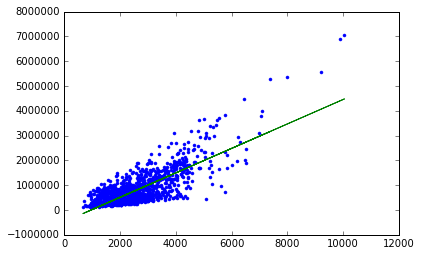

In [45]:
plt.plot(train_data['sqft_living'], train_data['price'], '.', 
         train_data['sqft_living'], model_basic.predict(train_data), '-')

In [46]:
print model_basic.evaluate(test_data)

{'max_error': 1509753.7929620033, 'rmse': 372065.9639150075}


In [47]:
NewCountyCork['price_predictions'] = NewCountyCork.apply(lambda x:get_regression_predictions(x['sqft_living'], intercept_sqft_living, slope_sqft_living))
NewCountyCork.head()

id,bathrooms,floors,yr_built,town_city,county,population,price,bedrooms,sqft_living,sqft_lot
3,1.0,1.0,1933,Cobh,Cork,12347,180000.0,2,770,10000
7,2.25,2.0,1995,Mallow,Cork,11605,257500.0,3,1715,6819
11,2.5,1.0,1965,Youghal,Cork,7794,662500.0,3,3560,9796
13,1.0,1.5,1927,Cobh,Cork,12347,310000.0,3,1430,19901
20,1.0,1.0,1969,Mallow,Cork,11605,230000.0,3,1250,9774
22,2.75,1.0,1968,Midleton,Cork,12001,2000000.0,3,3050,44867
48,2.5,2.0,1981,Youghal,Cork,7794,785000.0,4,2290,13416
67,2.5,2.0,1989,Carrigaline,Cork,14775,975000.0,4,2720,11049
70,2.25,1.0,1965,Carrigaline,Cork,14775,1330000.0,5,3200,20158
74,2.5,2.0,2005,Cork,Cork,198582,360000.0,4,2380,5000


## since we have some negative values we try to fit the model a bit better by makin it polynomial.

# Fitting Polynomials

In [48]:
# Create an SFrame consisting of the powers of an SArray up to a specific degree:
def polynomial_sframe(feature, degree):    
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = gl.SFrame()    
    poly_sframe['power_1'] = feature # and set poly_sframe['power_1'] equal to the passed feature
    if degree > 1: # first check if degree > 1
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. 
        # We want it to start at 2 and stop at degree        
        for power in range(2, degree+1):         
            # first we'll give the column a name:
            name = 'power_' + str(power)            
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [49]:
poly2_data = polynomial_sframe(NewCountyCork['sqft_living'], 2)
poly2_data['price'] = NewCountyCork['price'] # add price to the data since it's the target

In [50]:
poly2_data.head()

power_1,power_2,price
770,592900,180000.0
1715,2941225,257500.0
3560,12673600,662500.0
1430,2044900,310000.0
1250,1562500,230000.0
3050,9302500,2000000.0
2290,5244100,785000.0
2720,7398400,975000.0
3200,10240000,1330000.0
2380,5664400,360000.0


In [51]:
def plot_polynomial(input_data, input_feature, output_feature, order):
    input_data = input_data.sort([input_feature, output_feature])
    data = polynomial_sframe(input_data[input_feature], order)
    features = data.column_names() # get the name of the features
    data[output_feature] = input_data[output_feature] # add price to the data since it's the target
    model = gl.linear_regression.create(data, target=output_feature, features=features, validation_set=None, verbose=False)
    print model.get("coefficients")
    plt.plot(data['power_1'],data[output_feature],'.',data['power_1'], model.predict(data),'-')
    return model #this will allow to use the model for predictions

+-------------+-------+-----------------+------------------+
|     name    | index |      value      |      stderr      |
+-------------+-------+-----------------+------------------+
| (intercept) |  None |  95656.7566388  |  37432.3356133   |
|   power_1   |  None |  85.2459249383  |  23.8950061215   |
|   power_2   |  None | 0.0593379395871 | 0.00337111656013 |
+-------------+-------+-----------------+------------------+
[3 rows x 4 columns]



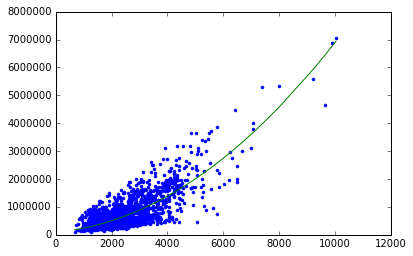

In [52]:
newmodel = plot_polynomial(NewCountyCork, 'sqft_living', 'price', 2)

In [53]:
print newmodel.coefficients
print newmodel.evaluate(test_data)

+-------------+-------+-----------------+------------------+
|     name    | index |      value      |      stderr      |
+-------------+-------+-----------------+------------------+
| (intercept) |  None |  95656.7566388  |  37432.3356133   |
|   power_1   |  None |  85.2459249383  |  23.8950061215   |
|   power_2   |  None | 0.0593379395871 | 0.00337111656013 |
+-------------+-------+-----------------+------------------+
[3 rows x 4 columns]

{'max_error': 3953704.230571281, 'rmse': 556495.8398274204}


In [54]:
example_predictions = newmodel.predict(train_data) # save all predictions in a new SFrame
print train_data[0]
print
print 'Est price for a house with', train_data[0]['sqft_living'], ' sq ft = ', example_predictions[0] # print the first graphlab model prediction 

# compare with our own function
print 'The estimated price for a house with ', train_data[0]['sqft_living'], ' sq ft living space is ', get_regression_predictions(train_data[0]['sqft_living'], intercept_sqft_living, slope_sqft_living)

{'bathrooms': 1.0, 'grade': 6L, 'price': 180000.0, 'bedrooms': 2L, 'town_city': 'Cobh', 'sqft_living_description': 'Small', 'county': 'Cork', 'sqft_living': 770L, 'floors': 1.0, 'condition': 3L, 'yr_built': 1933L, 'id': 3L, 'sqft_lot': 10000L, 'population': 12347L}

Est price for a house with 770  sq ft =  716295.769429
The estimated price for a house with  770  sq ft living space is  -96155.5725397


## We found our model by using a polynomial function, we added sqft_living to the power of 2 to fit the model better and avoid negative price estimation having low sqft_living values


# Finding the best 3 features for Co.Cork only data (if available)

In [97]:
#Using our previous method to find the best features
features_original = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','yr_built']
features_current = list(features_original)
features_best = []
best_solution_found = False

rmse_current = 0.0

rmse_best = float("inf")


while best_solution_found == False:
    
    best_feature = get_best_features_rmse(train_data, features_best, features_current, 'price')    

    if best_feature['rmse'] < rmse_best:
        rmse_best = best_feature['rmse']
        features_best.append(best_feature['feature'])
        features_current.remove(best_feature['feature']) 
    else:
        best_solution_found = True

    if len(features_current) == 5: # this will stop the loop selecting the best 3 features
        best_solution_found = True
            
    print 'Best feature =', best_feature['feature'], ', model rmse =', best_feature['rmse']

print
print 'Best model features: ', features_best
print 'Best model rmse: ', rmse_best

Best feature = sqft_living , model rmse = 403330.682387
Best feature = yr_built , model rmse = 381738.547115
Best feature = grade , model rmse = 365792.542467

Best model features:  ['sqft_living', 'yr_built', 'grade']
Best model rmse:  365792.542467


### c. Answer: the 3 best features to predict house prices across all countries are: 'sqft_living','yr_built' & 'grade', for Cork as well.

In [98]:
model_advanced = gl.linear_regression.create(train_data, target='price', 
                                             features=features_best, validation_set=None, verbose=False)
#print model_advacned.coefficients
print model_advanced.evaluate(test_data)

{'max_error': 1327262.9267338882, 'rmse': 312359.39978277276}


In [99]:
# comparing the new predictions with our old function
new_example_predictions = model_advanced.predict(test_data) # save all predictions in a new SFrame
print
print 'Estimated price by the multi-featured model for a house with', test_data[0]['sqft_living'], ' sq ft = ', new_example_predictions[0] # print the first graphlab model prediction 
print 'Estimated price by the multi-featured model for a house with', test_data[10]['sqft_living'], ' sq ft = ', new_example_predictions[10] # print the first graphlab model prediction 
print 'Estimated price by the multi-featured model for a house with', test_data[20]['sqft_living'], ' sq ft = ', new_example_predictions[20] # print the first graphlab model prediction 
print 'Estimated price by the multi-featured model for a house with', test_data[30]['sqft_living'], ' sq ft = ', new_example_predictions[30] # print the first graphlab model prediction 
print 'Estimated price by the multi-featured model for a house with', test_data[40]['sqft_living'], ' sq ft = ', new_example_predictions[40] # print the first graphlab model prediction 

# compare with our own function
print
print 'The estimated price for a house with ', test_data[0]['sqft_living'], ' sq ft living space is ', get_regression_predictions(test_data[0]['sqft_living'], intercept_sqft_living, slope_sqft_living)

example_predictions = newmodel.predict(test_data) # save all predictions in a new SFrame
print
print 'Est price by the polynomial model for a house with', test_data[0]['sqft_living'], ' sq ft = ', example_predictions[0] 



Estimated price by the multi-featured model for a house with 3560  sq ft =  1239688.22459
Estimated price by the multi-featured model for a house with 1760  sq ft =  266650.962045
Estimated price by the multi-featured model for a house with 1830  sq ft =  183176.34024
Estimated price by the multi-featured model for a house with 3070  sq ft =  1212229.03703
Estimated price by the multi-featured model for a house with 2090  sq ft =  802265.042964

The estimated price for a house with  3560  sq ft living space is  1280379.02933

Est price by the polynomial model for a house with 3560  sq ft =  716295.769429


In [87]:
dbmean = NewCountyCork['price'].mean()
multimean = new_example_predictions.mean()
polymean = example_predictions.mean()

print dbmean
print multimean
print polymean
print
print 'The difference between the average of the predicted price for our multi-featured model and the average house price is', multimean-dbmean
print
print 'The difference between the average of the predicted price for our polynomial model and the average house price is', int(polymean-dbmean)


716295.769429
688487.817548
716295.769429

The difference between the average of the predicted price for our multi-featured model and the average house price is -27807.9518806

The difference between the average of the predicted price for our polynomial model and the average house price is 0


### d. Answer 'The difference between the average of the predicted price and the average house price is 27808 € '

# Conclusions

There are few differences betweeen the results for all counties and the result for Co.Cork.

- If we take into consideration our models for all counties and Co.Cork, we can see that the slope for Co.Cork only database is steeper
- The RMSE value for the multi-featured model is higher for the Co.Cork only data.
- The individual and the best 3 features are the same for both databases, sqft_living for individual, grade and yr_built for multifeatured models
- If we take the multi-featured model the difference between the estimated house price average and the average house price is higher in Cork
- It is interesting to notice that the predicted house price average for our polynomial model is the same as the overall house price average

More info on the presentation/report.